# Multi classs classification with fashion MNIST

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#Show the first training exampel
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training label:\n{train_labels[0]}')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
#check the sahpe of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

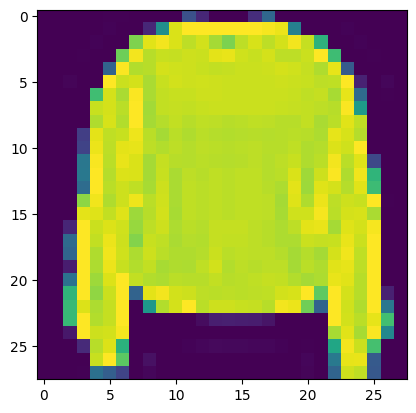

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Text(0.5, 1.0, 'Pullover')

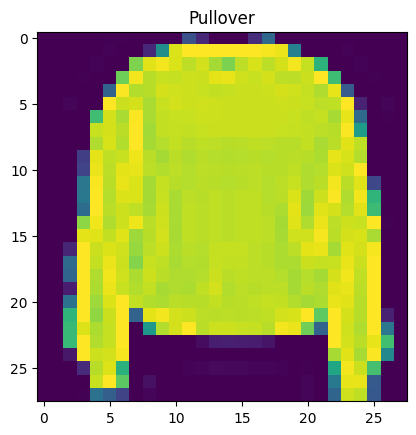

In [ ]:
plt.imshow(train_data[7])
plt.title(class_names[train_labels[7]])

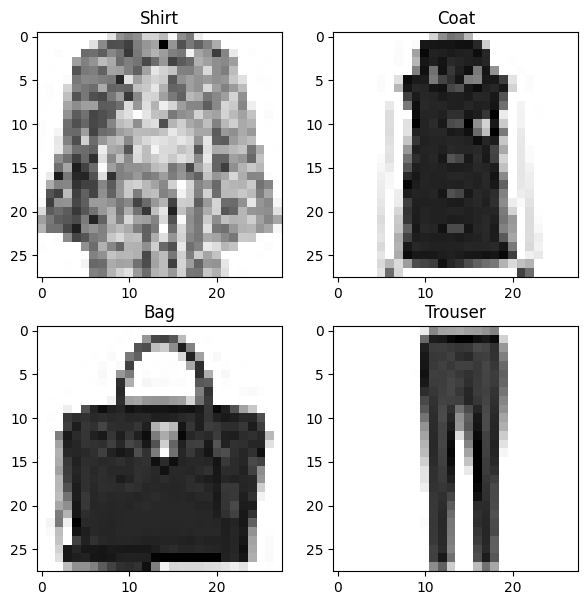

In [ ]:
#plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])

For our mulirclass classification model, we can use similar architercture to our binary classsifiers, however we are going to have to tweak some things:

In [ ]:
#Building multiclass classification model
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

#compile our model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#fit the model
history_1 = model_1.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3311 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#check  the min  and max value of the training data
train_data.min(), train_data.max()

(0, 255)

### Neural network preferred to be scalled (or normalized), this means they like to have the numbers in the tensors to try to find patterns between 0 and 1

In [ ]:
#We can train our training and test data between 0 and 1 b dividing it by the maximum
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

In [ ]:
# check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()


(0.0, 1.0)

In [ ]:
# Now let s use our normalized data , let s build a model for our normalized dat
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
#fit the model
norm_history = model_2.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3753 - accuracy: 0.5188 - val_loss: 0.9448 - val_accuracy: 0.6689
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8194 - accuracy: 0.7214 - val_loss: 0.7677 - val_accuracy: 0.7416
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6873 - accuracy: 0.7686 - val_loss: 0.6632 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6300 - accuracy: 0.7877 - val_loss: 0.6301 - val_accuracy: 0.7899
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6001 - accuracy: 0.7978 - val_loss: 0.6142 - val_accuracy: 0.7921
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5788 - accuracy: 0.8038 - val_loss: 0.6089 - val_accuracy: 0.7945
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5667 - accuracy: 0.8086 - val_loss: 0.6309 - val_accuracy:

### Comparing normalized and non normalized data

<Axes: title={'center': 'Normalized data'}>

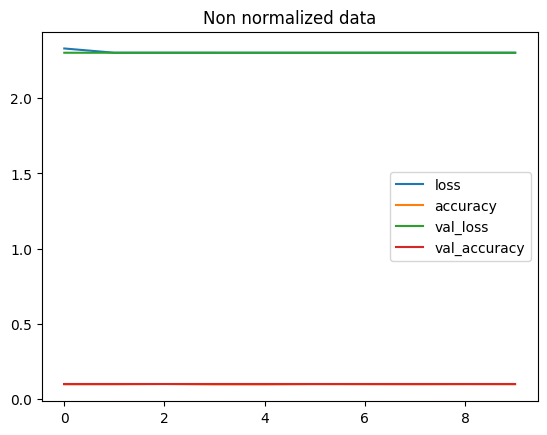

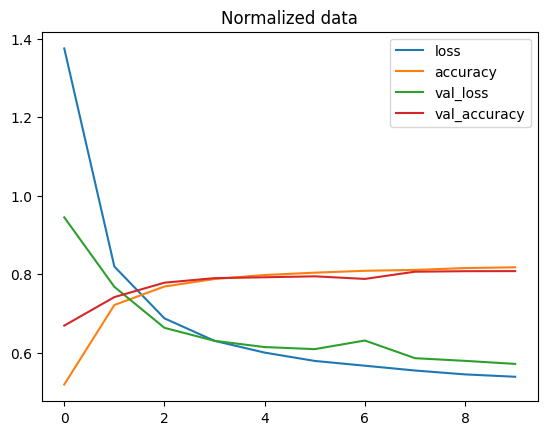

In [ ]:
import pandas as pd

#plot non normalized data loss  curves
pd.DataFrame(history_1.history).plot(title='Non normalized data')

#plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title='Normalized data')

**Note**: The same model with even *slightly* different data can produce *dramatically* different results. So when you re comparing models, it is impoertant to make sure you re comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture)

## Finding the ideal learning rate

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

history_3 = model_3.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_norm, test_labels), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0723 - accuracy: 0.5969 - val_loss: 0.8069 - val_accuracy: 0.6890 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7434 - accuracy: 0.7237 - val_loss: 0.7344 - val_accuracy: 0.7223 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6938 - accuracy: 0.7431 - val_loss: 0.7093 - val_accuracy: 0.7431 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6663 - accuracy: 0.7551 - val_loss: 0.6864 - val_accuracy: 0.7499 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6456 - accuracy: 0.7602 - val_loss: 0.6676 - val_accuracy: 0.7579 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6277 - accuracy: 0.7682 - val_loss: 0.6640 - val_accuracy: 0.7607 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 4)                 3140      
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import os
def get_file_size(file_name):
    file_stats = os.stat(file_name)
    return file_stats.st_size

import os
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    elif unit == "GB":
        return print('File size: ' + str(round(size / (1024 * 1024 * 1024), 3)) + ' Gigabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')



Text(0.5, 1.0, 'Learning rate vs Loss')

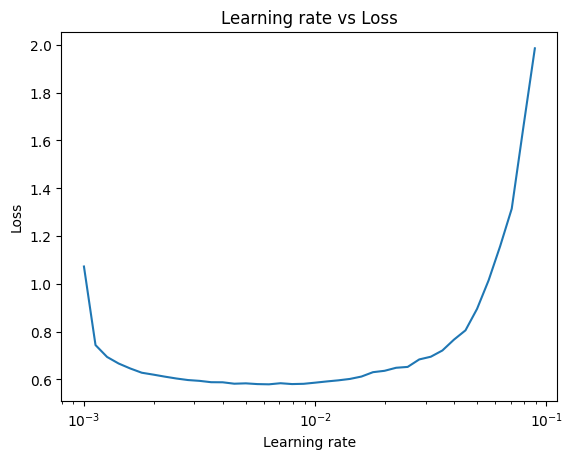

In [ ]:
# Plot the learning rate curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, history_3.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs Loss')

In [ ]:
#Let s fit with the ideal learning rate

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

history_4 = model_4.fit(train_data_norm, train_labels, epochs=20, validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.6097 - accuracy: 0.4163 - val_loss: 1.2327 - val_accuracy: 0.5721
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0336 - accuracy: 0.6487 - val_loss: 0.8738 - val_accuracy: 0.7297
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7396 - accuracy: 0.7718 - val_loss: 0.7084 - val_accuracy: 0.7636
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6358 - accuracy: 0.7916 - val_loss: 0.6435 - val_accuracy: 0.7860
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5949 - accuracy: 0.8001 - val_loss: 0.6328 - val_accuracy: 0.7850
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5758 - accuracy: 0.8047 - val_loss: 0.6159 - val_accuracy: 0.7863
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5637 - accuracy: 0.8075 - val_loss: 0.6115 - val_accuracy:

In [ ]:
#Evaluating our multi class classificiation model
model_4.evaluate(test_data_norm, test_labels)


313/313 [==============================] - 1s 3ms/step - loss: 0.5562 - accuracy: 0.8093


[0.5561748743057251, 0.8093000054359436]

In [ ]:
y_probs = model_4.predict(test_data_norm)
y_preds = y_probs.argmax(axis=1)
nots = 0
print(noty_preds == test_labels)

313/313 [==============================] - 1s 4ms/step
[ True  True  True ...  True  True  True]


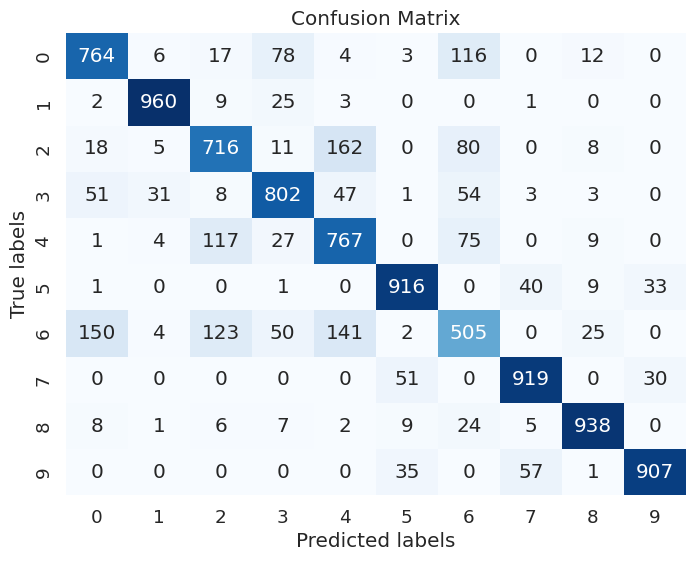

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming model_4 is your trained model and X_test, y_test are your test data
# Make predictions


# Calculate confusion matrix
cm = confusion_matrix(test_labels, y_preds)
# Assuming y_test and y_pred are numpy arrays and contain the actual and predicted labels respectively

# Get unique labels in the dataset
labels = np.unique(test_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# Convert to tflite model

In [ ]:
KERAS_MODEL_NAME = 'tf_fashion_mnist.h5'
tf.keras.models.save_model(model_4, KERAS_MODEL_NAME)

<ipython-input-22-861b3aabffbe>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model_4, KERAS_MODEL_NAME)


In [ ]:
model_4.save(KERAS_MODEL_NAME)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

size_in_bytes = get_file_size(KERAS_MODEL_NAME)
convert_bytes(size_in_bytes, "MB")

File size: 0.067 Megabytes


In [ ]:
TF_LITE_MODEL_NAME = 'tf_fashion_mnist_model.tflite'

In [ ]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model_4)
tflite_model = tf_lite_converter.convert()

In [ ]:
with open(TF_LITE_MODEL_NAME, 'wb') as f:
  f.write(tflite_model)

In [ ]:

size_in_bytes = get_file_size(TF_LITE_MODEL_NAME)
convert_bytes(size_in_bytes, "MB")

File size: 0.015 Megabytes


In [ ]:
interpreter = tf.lite.Interpreter(TF_LITE_MODEL_NAME)
interpreter.allocate_tensors()